# Doğrusal Regresyon

    Doğrusal regresyonda amacımız bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir.

<p align="center">
  <img src="grafikler/dr_1.png" height=150 >
</p>


Bu kapsamda yᶦ değerleri bağımlı değişkeni, xᵢ değişkenleri bağımsız değişkenleri wᵢ ifadeleri ise ağırlıkları temsil eder. Bir doğrusal regresyon modelinin öğrenme olarak ifade ettiği kavramlar b sabiti ve wᵢ ağırlıklarıdır.

* b sabiti literatürde, ß (beta), intercept, bias olarak da ifade edilir.
* wᵢ ifadesi kat sayı yani ağırlıktır. Bazı kaynaklarda coefficient olarak da ifade edilir. Kat sayısı olduğu değişkeni ifade etmek ve etkilerini belirlemek için kullanılır.

    b sabiti ve wᵢ ağırlıkları, gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamını/ortalamasını minimum yapabilecek şekilde kullanılır.

Bu kapsamda b sabiti ve ağırlığın optimal olarak seçilmesini matematiksel olarak ifade edilmesi amacıyla Cost (MSE) Fonksiyonu tanımlanır: (Ortalama Hataları temsil eder.)

Amaç belirli sabit ve ağırlık kombinasyonlarına karşılık elde edilen hata değerlerini gözlemleyip, bu sabit ve ağırlık değerlerini optimum olacak şekilde yani Cost fonksiyonunu en küçük verecek şekilde seçmeye çalışmaktır.

<p align="center">
  <img src="grafikler/cost_func.png" height=150 >
</p>

    Bu amaçla optimum ağırlıkları ve sabit değerini bulmak için Normal Denklemler Yöntemi ve Gradient Descent Yöntemi kullanılır.

* **Normal Denklemler Yöntemi: (En Küçük Kareler Yöntemi)** Türeve dayalı, matris formunda, Analitik bir çözümdür. OLS yöntemi olarak da isimlendirilir.

* **Gradient Descent Yöntemi: (Optimizasyon Çözümü)** Gradient Descent makine öğrenmesinden bağımsız olarak bir optimizasyon yapma yöntemidir. Bu yöntemin amacı bir fonksiyonu minimum yapacak parametre değerlerini bulmaktır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

### Simple Linear Regression with OLS Using Scikit-Learn

In [2]:
# Veri Setimizi import edelim,

df = pd.read_csv("datasets/advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [3]:
df.shape

# Verimiz 200 gözlemden ve 4 değişkenden oluşmaktadır.

(200, 4)

In [4]:
# df içerisinden değişkenlerimizi seçip tanımlayalım;

X = df[["TV"]]
y = df[["sales"]]

In [5]:
# Modelimizi kuralım;

reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

In [6]:
# sabit (b - bias)
reg_model.intercept_[0]

7.0325935491276965

In [7]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.047536640433019736

In [8]:
##########################
# Tahmin
##########################

# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [9]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637564

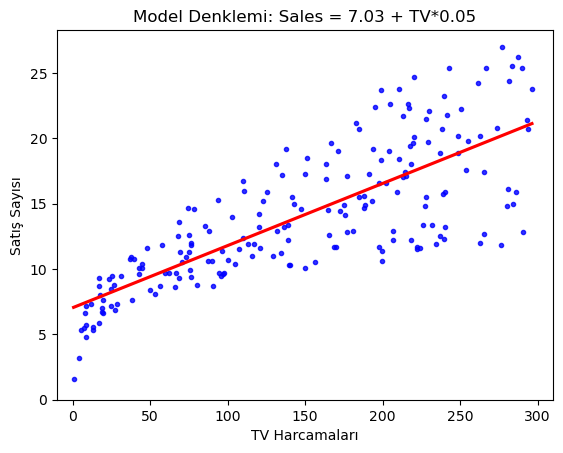

In [10]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

# regresyon grafiği oluşturmak için kullandığımız metod ".regplot()" metodudur.
# "x=" argümanı bağımsız değişken,
# "y=" argümanı ise bağımlı değişkeni ifade eder.
# "scatter_kws=" argümanı değerlere ilişkin parametreleri ifade eder, renk (color) ve büyüklük (s) vb...
# "ci=" argümanı güven aralığı değerini ifade eder.
# "color=" argümanı ise regresyon doğrusunun rengini ifade eder.

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [11]:
##########################
# Tahmin Başarısı
##########################

# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

    Yukarıda MSE'yi 10.51 olarak bulduk lakin bunun büyüklüğü ve küçüklüğü hakkında nasıl bir yorum yapabiliriz?

In [12]:
y.mean()

sales   14.02
dtype: float64

In [13]:
y.std()

sales   5.22
dtype: float64

    Yukarıda verinin ortalamasına ve standart sapması ile kıyaslayabiliriz.

In [14]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [15]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

    RMSE ve MAE'ye bakacak olursak çok da kötü bir tahminde bulunmadığımızı GÖRECELİ olarak söyleyebiliriz.

In [16]:
# R-KARE
reg_model.score(X, y)

# R-KARE veri setindeki bağımsız değişkenlerin, bağımlı değişkenleri açıklama yüzdesidir.
# Aşağıda görüldüğü üzere TV değişkeni sales'in %61'ini açıklamaktadır.

0.611875050850071

    NOT !!! : Bu çalışmada; istatistiksel, ekonometrik veya iktisadi açıdan bakılmamaktadır. Bu sebeple katsayıların anlamlılığı, F-istatistiği, normallik varsayımı gibi varsayımlar hesaba katılmamaktadır ve bu istatistiklerle ilgilenilmemektedir.

### Multiple Linear Regression

In [17]:
# dataframe'mimize bir reset atalım;

df = pd.read_csv("datasets/advertising.csv")

In [18]:
# Bağımlı ve bağımsız değişkenlerimiz seçelim;

X = df.drop('sales', axis=1)
y = df[["sales"]]

In [19]:
# Modelimizi kuralım;

# Modelimizi kurarken verimizi test ve train olmak üzere ikiye böleceğiz;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Bölünen verisetinin shape'lerini inceleyelim;

print(y_test.shape)
print(y_train.shape)


(40, 1)
(160, 1)


In [20]:
# Modelimizi oluşturalım;

reg_model = LinearRegression().fit(X_train, y_train)

In [21]:
# sabit'imize bakalım (b - bias);

reg_model.intercept_

array([2.90794702])

In [22]:
# Katsayılara bakalım; coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [23]:
##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [24]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [25]:
reg_model.predict(yeni_veri)

/Users/emintaskent/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [26]:
##########################
# Tahmin Başarısını Değerlendirme
##########################

In [27]:
# Train setindeki hatamıza bir bakalım;

# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.7369025901470923

In [28]:
# Train setindeki R-Kare değerine bir bakalım;

# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [29]:
# Test setindeki hatamıza bir bakalım;

# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41

1.4113417558581582

In [30]:
# Test setindeki R-Kare değerine bir bakalım;

# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

In [31]:
# 10 katlı bir cross validitaion ile skor'umuza (MSE) bakarsak;

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# Yukarıda hangi model üzerinde cross validation yapacağını söyledik. Bu case'de reg_model oldu.                                 

# Yukarıda bütün veri üzerinden çalışmasını istediğimiz için X ve y değerlerini girdik.
# Zaten sadece 200 gözlem vardı. Bu sebeple train'i bir daha bölmek istemedik. (Kullanıcının inisiyatifindedir.)
      
# Daha sonra veri setini kaç parçaya böleceğini söyledik.

# En sonunda ise hangi metriği istediğimizi söyledik. Burada istediğimiz metrik "neg_mean_squared_error" oldu.
# Negatif bir sayı çıkaracağı için de fonksiyonun başına eksi (-) koyduk.                

1.6913531708051797

    Şimdi yukarıdaki işlemi parçalayarak bir inceleyelim.

In [32]:
cross_val_score(reg_model,
                X,
                y,
                cv=10,
                scoring="neg_mean_squared_error")

# 10 işlem için de negatif MSE değerleri geldi.                 

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [33]:
-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")

# Eksi ile çarpılmış halleri.                                 

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [34]:
np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error"))

# Bir önceki kısımda MSE hesaplanması yapılmıştı lakin biz RMSE değerlerine bakmak istiyoruz.                                 

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

In [35]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# Son olarak da bölünmüş 10 veri seti üzerinden bu bulduğumuz skorların ortalamasını alalım.                                

1.6913531708051797

    Yukarıda bir train seti üzerinden RMSE hesapladık (sonuç 1.7369 çıktı), daha sonra ise test seti üzerinden RMSE (sonuç 1.4113 çıktı) hesapladık. Peki biz hangisine güvenceğiz? Veri setimiz sadece 200 gözlemden oluştuğu için (Görece az bir sayı olduğunu düşündüğümüz için böyle diyoruz.) emin olamıyoruz. Dolayısıyla çapraz doğrulama yaptık. Bu case'de çapraz doğrulamanın sonucuna güvenmeyi tercih edebiliriz.

In [36]:
# 5 katlı bir cross validitaion ile skor'umuza (MSE) bakarsak;

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086

In [37]:
######################################################
# Simple Linear Regression with Gradient Descent from Scratch
######################################################

Bu bölümde sıfırdan bütün kodlarını kendimiz yazarak Gradient Descent yöntemi ile simple linear regression modeli kuracağız.

* **Not !!! : Bu bölüm bir hayli matematik ve istatistik bilgisi gerektirmektedir ve ekstra bir bölümdür.**

    Amacımız değişkenlerin katsayı değerlerini değiştirerek/güncelleyerek MSE (Cost Function da denir) değerini minimuma indirmektir.

In [38]:
# İlk önce cost function tanımlayalım (MSE olarak da tanımlayabiliriz.);

def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y)**2
    mse = sse / m
    return mse


In [39]:
# ikinci fonksiyonumuzda ise ağırlıkları update edecek bir yapı yazıyoruz.

def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

    Yukarıda bir cost function tanımladık, bir de update weights function tanımladık. Lakin update function bizim katsayılarımızı bir kere update etmektedir. Bizim optimal noktaya (MSE'nin minimum olma durumu) kadar update edecek bir başka fonksiyona ihtiyacımız var.

In [40]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))
    # Yukarıda işleme başlamadan önce başlangıç hiper parametrelere ilişkin bilgiler veriliyor.

    b = initial_b
    w = initial_w
    cost_history = []   # MSE değerlerini bir listede tutacağız onun için boş bir liste tanımlıyoruz.

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)

        # MSE değerlerini tanımladığımız listede tutacağız.

        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))
        
        # Yukarıdaki if bloğunda her 100 denemede bir mevcut durumu görebilmek için bir çıktı istiyoruz.


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    # Döngü sonucunda son bir raporlama yapıyoruz.

    return cost_history, b, w

    # Çıktıları döndürüyoruz.

    Hiperparametre ile parametre arasındaki farkı ifade etmemiz gerekirse, parametre modelin veriyi kullanarak veriden hareketle bulduğu değerler iken, hiper parametreler ise veri setinden bulunamayan ve kullanıcı tarafından atanması gereken paremetrelerdir.

In [41]:
# Şimdi yazdığımız fonksiyonları çalıştıralım;

df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

# Şimdi train fonksiyonunda atanması gereken hiper parametreler bulunmaktadır. Bunları atayacağız.
# Bu atamalar tamamen bizim inisiyatifimizdedir şu anda.

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25